In [121]:

# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder   
     

In [122]:

# Importing the dataset
dataset = pd.read_csv('crimedata.csv')
X = dataset.iloc[:, [2,3,4,5,6,7,8]].values
#dataset.park = dataset.park.astype(str)
# X=dataset[['park','assassination', 'theft', 'gang_rape' , 'burglary' ,'rape' ,'assualt_attack', 'harassment(sexual)']] = dataset[
#              ['park','assassination', 'theft', 'gang_rape' , 'burglary' ,'rape' ,'assualt_attack', 'harassment(sexual)']].apply(LabelEncoder().fit_transform)
     

In [123]:
X

array([[2, 0, 1, ..., 1, 2, 9],
       [2, 0, 1, ..., 1, 2, 1],
       [2, 0, 1, ..., 1, 2, 1],
       ...,
       [2, 0, 1, ..., 1, 2, 1],
       [2, 0, 1, ..., 1, 2, 1],
       [2, 4, 1, ..., 1, 2, 1]])

In [124]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
    

<ipython-input-125-50456b885570>:6: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-125-50456b885570>:6: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-125-50456b885570>:6: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-125-50456b885570>:6: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-125-50456b885570>:6: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-125-50456b885570>:6: ConvergenceWarning: Number of distinct clusters (9) found smaller tha

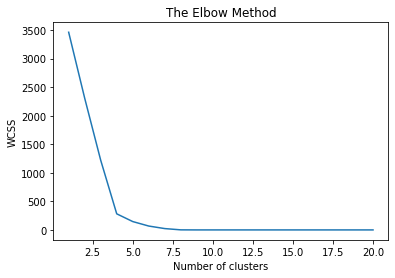

In [125]:

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):   #range(1,1154)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)  #random state 1 or 42
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

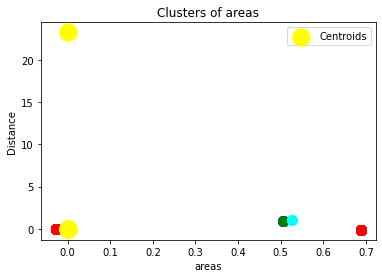

In [126]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(X)


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta' )
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black' )



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of areas')
plt.xlabel('areas')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [127]:
X

array([[ 0.5058989 ,  0.90065521],
       [-0.02677047, -0.00145159],
       [-0.02677047, -0.00145159],
       ...,
       [-0.02677047, -0.00145159],
       [-0.02677047, -0.00145159],
       [ 0.50594346,  0.90092436]])

In [129]:
Data=dataset
for i in range(1154):
   Data.totalcrime[i]=Data.totalcrime[i]/7

<ipython-input-129-605665f35715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.totalcrime[i]=Data.totalcrime[i]/7


In [130]:
Data=Data[["long","lat","totalcrime"]]
Data

,long,lat,totalcrime
0,-73.822157,40.854131,2
1,-73.886580,40.897075,1
2,NaN,NaN,1
3,-74.179968,40.579189,1
4,-73.842754,40.740421,1
...,...,...,...
1149,-73.884793,40.844184,2
1150,-74.002687,40.727960,1
1151,NaN,NaN,1
1152,-73.998090,40.728847,1


In [131]:
Data.dropna()

,long,lat,totalcrime
0,-73.822157,40.854131,2
1,-73.886580,40.897075,1
3,-74.179968,40.579189,1
4,-73.842754,40.740421,1
6,-73.934197,40.605579,1
...,...,...,...
1146,-73.940900,40.817048,1
1147,-89.267483,37.301260,1
1149,-73.884793,40.844184,2
1150,-74.002687,40.727960,1


In [132]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
Data=Data.dropna(subset=['long'])

Data=Data.dropna(subset=['lat'])

In [140]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster 

# Create a base map  , 
m_4 = folium.Map(location=[40.71484724940077,-74.00168647799217], tiles='cartodbpositron', zoom_start=13)

val = Data.totalcrime
def color_producer(val):
    if (val <= 2):
        return 'forestgreen'
    if (val <=5 and  val > 2): 
        return 'yellow'   
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(Data)):
    Circle(
        location=[Data.iloc[i]['lat'], Data.iloc[i]['long']],
        radius=10,
        color=color_producer(Data.iloc[i]['totalcrime'])).add_to(m_4)

# Display the map
m_4